In [7]:
from sunbird.summaries import TPCF

emulator = TPCF()
s = emulator.coordinates['s']

select_filters = {
    'multipoles': [0]
}
slice_filters = {
    's': [1, 150]
}

cosmo_params = {'omega_b': 0.02, 'omega_cdm': 0.12, 'sigma8_m': 0.8,
                'n_s': 0.96, 'nrun': 0.0, 'N_ur':2.03, 'w0_fld': -1.0, 'wa_fld': 0.0}

hod_params = {'logM1': 13.9, 'logM_cut': 12.6, 'alpha': 0.75, 'alpha_s': 1.0,
             'alpha_c': 0.3, 'logsigma': -1.8, 'kappa': 0.1, 'B_cen': 0.0, 'B_sat': 0.0}

parameters = {**cosmo_params, **hod_params}

prediction = emulator(
    param_dict=parameters,
    select_filters=select_filters,
    slice_filters=slice_filters,
    return_errors=False,
).numpy()

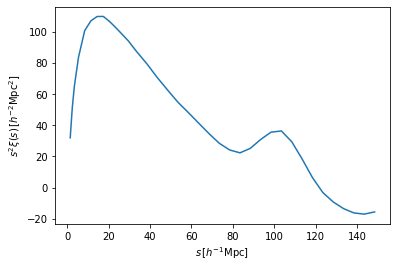

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.errorbar(s, s**2*prediction)
ax.set_xlabel(r'$s\,[h^{-1}{\rm Mpc}]$')
ax.set_ylabel(r'$s^2\xi(s)\,[h^{-2}{\rm Mpc}^2]$')
plt.show()